In [42]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [43]:
df=pd.read_csv(r"..\csv_files\Backpack_price_prediction\train.csv")

In [44]:
df.describe()

,id,Compartments,Weight Capacity (kg),Price
count,300000.000000,300000.000000,299862.000000,300000.000000
mean,149999.500000,5.443590,18.029994,81.411107
std,86602.684716,2.890766,6.966914,39.039340
min,0.000000,1.000000,5.000000,15.000000
25%,74999.750000,3.000000,12.097867,47.384620
50%,149999.500000,5.000000,18.068614,80.956120
75%,224999.250000,8.000000,24.002375,115.018160
max,299999.000000,10.000000,30.000000,150.000000


In [45]:
df.isnull().sum()

id                         0
Brand                   9705
Material                8347
Size                    6595
Compartments               0
Laptop Compartment      7444
Waterproof              7050
Style                   7970
Color                   9950
Weight Capacity (kg)     138
Price                      0
dtype: int64

In [46]:
df["Weight Capacity (kg)"].fillna(df["Weight Capacity (kg)"].mean(), inplace=True)


In [47]:
from sklearn.preprocessing import OrdinalEncoder

# Define categorical columns
categorical_cols = ['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']

# Convert categorical columns to string (to avoid issues with mixed data types)
df[categorical_cols] = df[categorical_cols].astype(str)

# Apply Ordinal Encoding
ordinal_encoder = OrdinalEncoder()
df[categorical_cols] = ordinal_encoder.fit_transform(df[categorical_cols]).astype(int)  # Convert to int if needed

# Store encoder for inverse transformation later
ordinal_encoders = ordinal_encoder  

# Print first few rows to verify
print(df.head())


   id  Brand  Material  Size  Compartments  Laptop Compartment  Waterproof  \
0   0      1         1     1           7.0                   1           0   
1   1      1         0     2          10.0                   1           1   
2   2      4         1     2           2.0                   1           0   
3   3      2         2     2           8.0                   1           0   
4   4      0         0     1           1.0                   1           1   

   Style  Color  Weight Capacity (kg)      Price  
0      2      0             11.611723  112.15875  
1      1      3             27.078537   68.88056  
2      1      5             16.643760   39.17320  
3      1      3             12.937220   80.60793  
4      1      3             17.749338   86.02312  


In [48]:
df.isnull().sum()

id                      0
Brand                   0
Material                0
Size                    0
Compartments            0
Laptop Compartment      0
Waterproof              0
Style                   0
Color                   0
Weight Capacity (kg)    0
Price                   0
dtype: int64

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[["Weight Capacity (kg)", "Compartments"]] = scaler.fit_transform(df[["Weight Capacity (kg)", "Compartments"]])


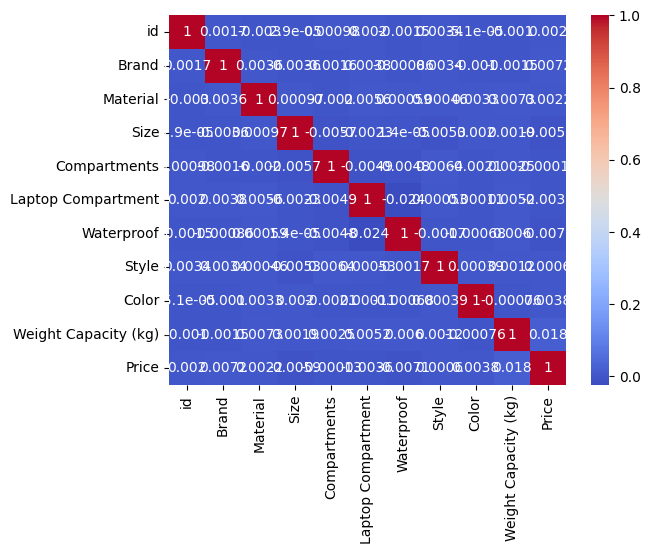

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()


In [51]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [53]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 86.15  92.09]
 [ 82.11  26.99]
 [ 93.55 100.47]
 ...
 [ 64.42 150.  ]
 [ 80.3  119.84]
 [106.68  28.14]]


In [54]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.12368927385996842

In [55]:
from xgboost import XGBRegressor
classifier = XGBRegressor()
classifier.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = regressor.predict(X_test)
r2_score(y_test, y_pred)

-0.12368927385996842

In [56]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Apply GridSearchCV
grid_search = GridSearchCV(xgb, param_grid, scoring='r2', cv=5, n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on test data
y_pred = best_model.predict(X_test)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)

# Print R² score
from sklearn.metrics import r2_score
print("R² Score:", r2_score(y_test, y_pred))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
R² Score: 0.001900717578124933
